In [4]:
#%matplotlib widget
%matplotlib inline

import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd
from natsort import natsorted

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import *
from misc_process import get_maxima_LSPR

In [5]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data','')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH_3_5A = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','20_06_2023_AuDNA_17C_35mins_2secint','3.5A','')
DATA_UV_DIR_PATH_3_4A = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','20_06_2023_AuDNA_17C_35mins_2secint','3.4A','') # Taken from experiment done on 20-06-2023 - the first run
DATA_UV_DIR_PATH_3_3A = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','20_06_2023_AuDNA_17C_35mins_2secint','3.3A','')
DATA_UV_DIR_PATH_3_2A = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','19_06_2023_AuDNA_17C_3_4A_30mins_2sec','3.2A_2sec_35mins','')
DATA_UV_DIR_PATH_3_1A = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','19_06_2023_AuDNA_17C_3_4A_30mins_2sec','3.1A_2sec_35mins','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si_figs', 'png', '')


3.5A 955
3.4A 955
3.3A 955
3.2A 841
3.1A 841


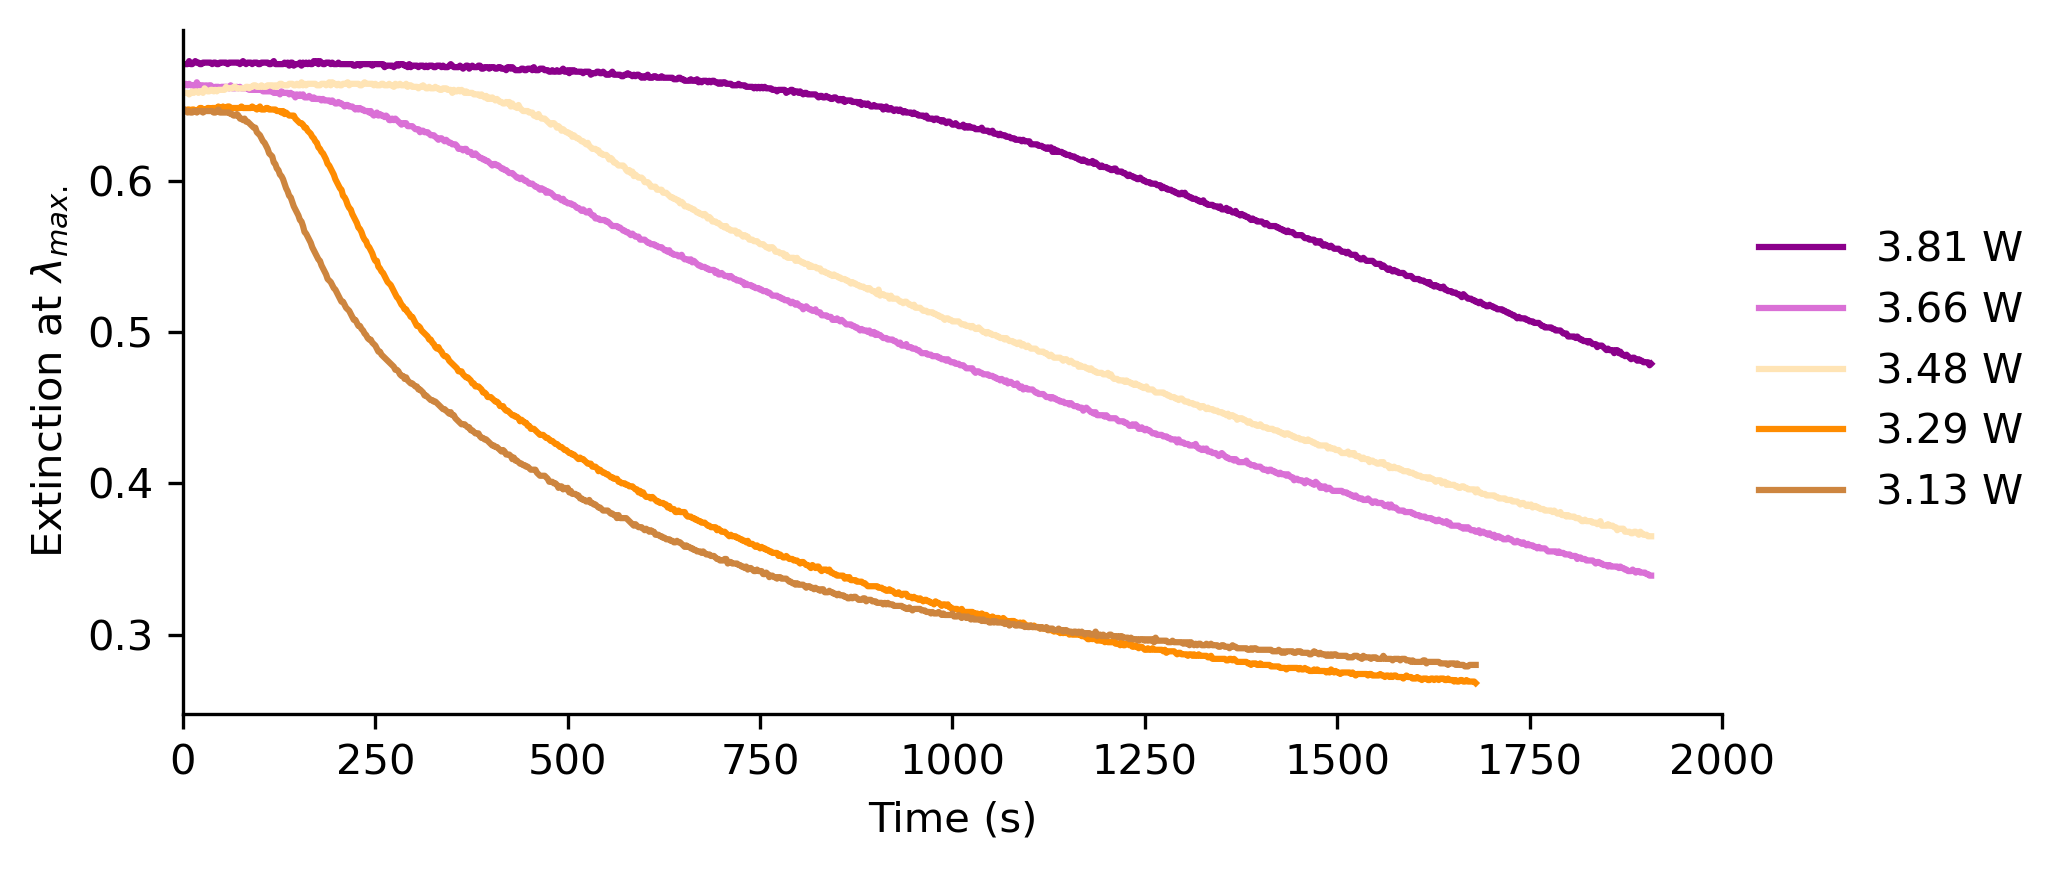

In [6]:
'''
Import cooling data from UV-Vis-NIR folder
'''

#================ import data =========================#

# Define the path to the folder containing the CSV files
folder_path_3_5A = DATA_UV_DIR_PATH_3_5A
folder_path_3_4A = DATA_UV_DIR_PATH_3_4A
folder_path_3_3A = DATA_UV_DIR_PATH_3_3A
folder_path_3_2A = DATA_UV_DIR_PATH_3_2A
folder_path_3_1A = DATA_UV_DIR_PATH_3_1A

# Get a list of all CSV files in the folder
txt_files_3_5A = glob.glob(os.path.join(folder_path_3_5A, '*.txt'))
txt_files_3_4A = glob.glob(os.path.join(folder_path_3_4A, '*.txt'))
txt_files_3_3A = glob.glob(os.path.join(folder_path_3_3A, '*.txt'))
txt_files_3_2A = glob.glob(os.path.join(folder_path_3_2A, '*.txt'))
txt_files_3_1A = glob.glob(os.path.join(folder_path_3_1A, '*.txt'))

print('3.5A',len(txt_files_3_5A))
print('3.4A', len(txt_files_3_4A))
print('3.3A', len(txt_files_3_3A))
print('3.2A', len(txt_files_3_2A))
print('3.1A', len(txt_files_3_1A))

# Initialize the maximum value and its corresponding index 3.5A
max_values_cool_3_5A = []
max_indexes_cool_3_5A = []
wv_abs_cool_3_5A = []

time_cool_3_5A = 0

for i, txt_file in enumerate(natsorted(txt_files_3_5A)):
    # Read the CSV file into a Pandas DataFrame
    df_cool_3_5A = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool_3_5A = df_cool_3_5A.iloc[324:954, ]
    
    # Find the maximum value and its corresponding index
    max_value_cool_3_5A = new_df_cool_3_5A[1].max()
    max_values_cool_3_5A.append(max_value_cool_3_5A)
    
    # Get the corresponding value from the first column
    max_index_cool_3_5A = new_df_cool_3_5A.loc[new_df_cool_3_5A[1].idxmax(), 0]
    max_indexes_cool_3_5A.append(max_index_cool_3_5A)
    
    wv_abs_cool_3_5A.append((time_cool_3_5A, max_index_cool_3_5A, max_value_cool_3_5A))
    time_cool_3_5A = time_cool_3_5A + 2 # 2 seconds

column_names = ['time', 'max_wav', 'abs_max']
df_spec_3_5A = pd.DataFrame(wv_abs_cool_3_5A, columns=column_names)

# Initialize the maximum value and its corresponding index 3.4A
max_values_cool_3_4A = []
max_indexes_cool_3_4A = []
wv_abs_cool_3_4A = []

time_cool_3_4A = 0

for i, txt_file in enumerate(natsorted(txt_files_3_4A)):
    # Read the CSV file into a Pandas DataFrame
    df_cool_3_4A = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool_3_4A = df_cool_3_4A.iloc[324:954, ]
    
    # Find the maximum value and its corresponding index
    max_value_cool_3_4A = new_df_cool_3_4A[1].max()
    max_values_cool_3_4A.append(max_value_cool_3_4A)
    
    # Get the corresponding value from the first column
    max_index_cool_3_4A = new_df_cool_3_4A.loc[new_df_cool_3_4A[1].idxmax(), 0]
    max_indexes_cool_3_4A.append(max_index_cool_3_4A)
    
    wv_abs_cool_3_4A.append((time_cool_3_4A, max_index_cool_3_4A, max_value_cool_3_4A))
    time_cool_3_4A = time_cool_3_4A + 2 # 2 seconds

column_names = ['time', 'max_wav', 'abs_max']
df_spec_3_4A = pd.DataFrame(wv_abs_cool_3_4A, columns=column_names)

# Initialize the maximum value and its corresponding index 3.3A
max_values_cool_3_3A = []
max_indexes_cool_3_3A = []
wv_abs_cool_3_3A = []

time_cool_3_3A = 0

for i, txt_file in enumerate(natsorted(txt_files_3_3A)):
    # Read the CSV file into a Pandas DataFrame
    df_cool_3_3A = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool_3_3A = df_cool_3_3A.iloc[324:954, ]
    
    # Find the maximum value and its corresponding index
    max_value_cool_3_3A = new_df_cool_3_3A[1].max()
    max_values_cool_3_3A.append(max_value_cool_3_3A)
    
    # Get the corresponding value from the first column
    max_index_cool_3_3A = new_df_cool_3_3A.loc[new_df_cool_3_3A[1].idxmax(), 0]
    max_indexes_cool_3_3A.append(max_index_cool_3_3A)
    
    wv_abs_cool_3_3A.append((time_cool_3_3A, max_index_cool_3_3A, max_value_cool_3_3A))
    time_cool_3_3A = time_cool_3_3A + 2 # 2 seconds

column_names = ['time', 'max_wav', 'abs_max']
df_spec_3_3A = pd.DataFrame(wv_abs_cool_3_3A, columns=column_names)

# Initialize the maximum value and its corresponding index 3.2A
max_values_cool_3_2A = []
max_indexes_cool_3_2A = []
wv_abs_cool_3_2A = []

time_cool_3_2A = 0

for i, txt_file in enumerate(natsorted(txt_files_3_2A)):
    # Read the CSV file into a Pandas DataFrame
    df_cool_3_2A = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool_3_2A = df_cool_3_2A.iloc[324:954, ]
    
    # Find the maximum value and its corresponding index
    max_value_cool_3_2A = new_df_cool_3_2A[1].max()
    max_values_cool_3_2A.append(max_value_cool_3_2A)
    
    # Get the corresponding value from the first column
    max_index_cool_3_2A = new_df_cool_3_2A.loc[new_df_cool_3_2A[1].idxmax(), 0]
    max_indexes_cool_3_2A.append(max_index_cool_3_2A)
    
    wv_abs_cool_3_2A.append((time_cool_3_2A, max_index_cool_3_2A, max_value_cool_3_2A))
    time_cool_3_2A = time_cool_3_2A + 2 # 2 seconds

column_names = ['time', 'max_wav', 'abs_max']
df_spec_3_2A = pd.DataFrame(wv_abs_cool_3_2A, columns=column_names)

# Initialize the maximum value and its corresponding index 3.1A
max_values_cool_3_1A = []
max_indexes_cool_3_1A = []
wv_abs_cool_3_1A = []

time_cool_3_1A = 0

for i, txt_file in enumerate(natsorted(txt_files_3_1A)):
    # Read the CSV file into a Pandas DataFrame
    df_cool_3_1A = pd.read_csv(txt_file, skiprows=14, delimiter='\t', header=None)
    new_df_cool_3_1A = df_cool_3_1A.iloc[324:954, ]
    
    # Find the maximum value and its corresponding index
    max_value_cool_3_1A = new_df_cool_3_1A[1].max()
    max_values_cool_3_1A.append(max_value_cool_3_1A)
    
    # Get the corresponding value from the first column
    max_index_cool_3_1A = new_df_cool_3_1A.loc[new_df_cool_3_1A[1].idxmax(), 0]
    max_indexes_cool_3_1A.append(max_index_cool_3_1A)
    
    wv_abs_cool_3_1A.append((time_cool_3_1A, max_index_cool_3_1A, max_value_cool_3_1A))
    time_cool_3_1A = time_cool_3_1A + 2 # 2 seconds

column_names = ['time', 'max_wav', 'abs_max']
df_spec_3_1A = pd.DataFrame(wv_abs_cool_3_1A, columns=column_names)


# Plot of absorbance at max. wavelength with time

fig = plt.figure(figsize=(7,3), dpi=300) # generate a figure
ax_3_5A = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one
ax_3_5A.plot(df_spec_3_5A['time'], df_spec_3_5A['abs_max'], label='3.81 W', color='darkmagenta')                           # plot data 3.5A
ax_3_5A.plot(df_spec_3_4A['time'], df_spec_3_4A['abs_max'], label='3.66 W', color='orchid')                           # plot data 3.4A
ax_3_5A.plot(df_spec_3_3A['time'], df_spec_3_3A['abs_max'], label='3.48 W', color='moccasin')                           # plot data 3.3A
ax_3_5A.plot(df_spec_3_2A['time'], df_spec_3_2A['abs_max'], label='3.29 W', color='darkorange')                           # plot data 3.2A
ax_3_5A.plot(df_spec_3_1A['time'], df_spec_3_1A['abs_max'], label='3.13 W', color='peru')                           # plot data 3.1A

ax_3_5A.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
ax_3_5A.set_xlim([0,2000])                   
#ax.set_ylim([-0.1,1.0])                       
ax_3_5A.set_xlabel(r'Time (s)')          # set axis label
ax_3_5A.set_ylabel(r'Extinction at $\lambda_{max.}$')              # set axis label
ax_3_5A.spines['top'].set_visible(False)
ax_3_5A.spines['right'].set_visible(False)

plt.tight_layout() 

plt.savefig(RESULT_DIR_PATH_SI + 'Fig_S5.png', transparent = True, bbox_inches = 'tight')